# Exploratory Visualization (_Hallelujah_, Taiwan only)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn

from pathlib import Path

## Retrieve and Subset Datasource

Retrieve all good trials for IDs that came from Javier's algorithm.

In [31]:
notebook_song_name = 'hallelujah'

In [32]:
data_root = Path('../../neural_nets/fastai/import-hallelujah-taiwan/data')

df_all = pd.read_csv(data_root / 'good_reaction_trials_categorified_no_impute.csv')

pd.set_option('display.max_columns', None)
df_all.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,musicpref_pop,musicpref_hiphop,musicpref_jazz,musicpref_classical,musicpref_folk,musicpref_rock,musicpref_world,musicpref_dance
count,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,17.419753,3.703704,2.395062,3.91358,3.172840,3.259259,3.629630,3.172840,3.407407,3.222222,3.000000,2.543210,4.148148,3.358025,3.296296,3.703704,3.370370,3.074074,3.518519,-1.0,3.518519,4.197531,4.246914,4.259259,3.456790,4.148148,2.506173,0.679012,0.123457,0.160494,0.308642,0.160494,0.320988,0.111111,0.111111
std,8.271735,1.089087,1.291114,1.08625,1.159635,1.330205,1.279106,1.137872,1.201850,1.204159,1.140175,1.215004,0.923460,1.207359,1.409295,1.111805,1.308094,1.201850,1.108051,0.0,1.304905,1.065596,1.006614,0.932440,1.118586,0.950146,1.589996,0.469765,0.331010,0.369350,0.464811,0.369350,0.469765,0.316228,0.316228
min,6.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,1.000000,3.00000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,2.000000,4.00000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,-1.0,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,4.000000,3.000000,5.00000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,-1.0,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,48.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
print(f"Total N: {df_all.shape[0]}")

Total N: 81


In [34]:
df_reaction = df_all[df_all['critical_reaction'] == True]
df_no_reaction = df_all[df_all['critical_reaction'] == False]

In [35]:
print(f"Total reaction N: {df_reaction.shape[0]}")
print(f"Total no-reaction N: {df_no_reaction.shape[0]}")

Total reaction N: 36
Total no-reaction N: 45


In [36]:
df_all.columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'control_familiarity', 'song_power', 'song_like_dislike',
       'song_tension', 'song_engagement', 'song_activity', 'song_positivity',
       'song_familiarity', 'song', 'musicpref_pop', 'musicpref_hiphop',
       'musicpref_jazz', 'musicpref_classical', 'musicpref_folk',
       'musicpref_rock', 'musicpref_world', 'musicpref_dance'],
      dtype='object')

In [37]:
def combine_personality(regular, inverted):
    return regular + ((-1. * (inverted - 3)) + 3)

In [38]:
personality_traits = {
    'extraversion': {'normal': 'personality_outgoing', 'inverted': 'personality_reserved'},
    'agreeableness': {'normal': 'personality_trusting', 'inverted': 'personality_fault'},
    'conscientiousness': {'normal': 'personality_thorough', 'inverted': 'personality_lazy'},
    'neuroticism': {'normal': 'personality_nervous', 'inverted': 'personality_stress'},
    'openness': {'normal': 'personality_imagination', 'inverted': 'personality_artistic'},
}

In [39]:
for t in personality_traits:
    df_all['personality_' + t] = combine_personality(df_all[personality_traits[t]['normal']], df_all[personality_traits[t]['inverted']])
    df_all = df_all.drop(labels=[personality_traits[t]['normal'], personality_traits[t]['inverted']], axis=1)

In [40]:
df_all.columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'musical_expertise', 'concentration',
       'critical_reaction', 'control_power', 'control_like_dislike',
       'control_tension', 'control_engagement', 'control_activity',
       'control_positivity', 'control_familiarity', 'song_power',
       'song_like_dislike', 'song_tension', 'song_engagement', 'song_activity',
       'song_positivity', 'song_familiarity', 'song', 'musicpref_pop',
       'musicpref_hiphop', 'musicpref_jazz', 'musicpref_classical',
       'musicpref_folk', 'musicpref_rock', 'musicpref_world',
       'musicpref_dance', 'personality_extraversion',
       'personality_agreeableness', 'personality_conscientiousness',
       'personality_neuroticism', 'personality_openness'],
      dtype='object')

In [41]:
cat_cols = ['location', 'language', 'nationality', 'sex', 
            'hearing_impairments']

ord_cols = ['personality_extraversion', 'personality_agreeableness', 
            'personality_conscientiousness', 'personality_neuroticism', 'personality_openness']

cont_cols = ['age']

In [42]:
# nationality_counts = df_all['nationality'].value_counts()
# patches, texts = plt.pie(nationality_counts, 
#                                     explode=[0.1] * len(nationality_counts));

# labels = ['{}: {}'.format(x.capitalize(), nationality_counts[x]) for x in nationality_counts.index]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_nationalities_{}_new_split.pdf'.format(notebook_song_name))

In [43]:
# language_counts = df_all['language'].value_counts()
# patches, texts = plt.pie(language_counts, 
#                                     explode=[0.1] * len(language_counts));

# languages = list(language_counts.index)
# for i in range(len(languages)):
#     language = languages[i]
#     if language == 'en':
#         languages[i] = 'English'
#     elif language == 'zh_TW':
#         languages[i] = 'Taiwanese'

# labels = ['{}: {}'.format(languages[i].capitalize(), language_counts[x]) for i, x in enumerate(language_counts.index)]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_languages_{}_new_split.pdf'.format(notebook_song_name))

In [44]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = np.cov(data, rowvar=False, bias=not unbiased_cov)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [45]:
def run_tests(x_label, dist_var, bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=False, print_output=False):
    
    if plots:
        f = plt.figure(figsize=(8, 4))
        sns.distplot(df_all[dist_var].dropna(), bins=bins, norm_hist=normed, kde=kde, rug=True, kde_kws={'bw': bw})
        plt.xlabel('')
        if x_lim is not None:
            plt.xlim([0.5, 5.5])

        g = sns.FacetGrid(df_all, hue='critical_reaction', height=4, aspect=2)
        g.map(sns.distplot, dist_var, bins=bins, norm_hist=normed, kde=kde, kde_kws={'bw': bw})
        g.set_xlabels(x_label)
        if x_lim is not None:
            g.axes[0,0].set_xlim([0.5, 5.5])
        g.fig.suptitle('Distribution of {} by reaction group'.format(dist_var), y=1.0)
        g.add_legend(title='Hallelujah Reaction');

        fig_file = 'hallelujah_reaction_distribution_hallelujah_{}_new_split.pdf'.format(dist_var)
        g.savefig(fig_file, orientation='landscape')
        
    mean_true = df_all[df_all['critical_reaction'] == True][dist_var].dropna()
    mean_false = df_all[df_all['critical_reaction'] == False][dist_var].dropna()
    
    all_normtest = sps.normaltest(df_all[dist_var])
    true_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == True][dist_var])
    false_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == False][dist_var])
    if print_output:
        print(f'All normal test results: {all_normtest}')
        print(f'Reaction normal test results: {true_normtest}')
        print(f'No-reaction normal test results: {false_normtest}')
    
    alpha = 0.05
    _, equal_variance_p = sps.levene(mean_true, mean_false)
    
    equal_var = None
    if equal_variance_p >= alpha:
        equal_var = True
    else:
        equal_var = False
    
    t_stat, t_p = sps.ttest_ind(mean_true, mean_false, equal_var=equal_var)
    u_stat, u_p = sps.mannwhitneyu(mean_true, mean_false, alternative='two-sided')

    if print_output:
        print('Student\'s t-test for difference in mean {} between Hallelujah Reaction groups'.format(x_label.capitalize()))

        print('T test statistic: {:.4f}'.format(t_stat))
        print('T test p-value: {:.4f}'.format(t_p))

        print('Mann-Whitney U test statistic: {:.4f}'.format(u_stat))
        print('Mann-Whitney U test p-value: {:.4f}'.format(u_p))

        if t_p <= alpha or u_p <= alpha:
            print('**** Significant Result ****')
    
    return {
        'mean_true': mean_true.mean(),
        'mean_false': mean_false.mean(),
        'median_true': mean_true.median(),
        'median_false': mean_false.median(),
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p
    }

All normal test results: NormaltestResult(statistic=22.376080092976323, pvalue=1.3838720707335383e-05)
Reaction normal test results: NormaltestResult(statistic=14.494842274203318, pvalue=0.000712008194776014)
No-reaction normal test results: NormaltestResult(statistic=14.330616962006113, pvalue=0.0007729405032227551)
Student's t-test for difference in mean Age [years] between Hallelujah Reaction groups
T test statistic: -1.7271
T test p-value: 0.0881
Mann-Whitney U test statistic: 615.5000
Mann-Whitney U test p-value: 0.0648


{'mean_true': 15.666666666666666,
 'mean_false': 18.822222222222223,
 'median_true': 13.5,
 'median_false': 17.0,
 't_stat': -1.7270723199332354,
 't_p': 0.08806283824124926,
 'u_stat': 615.5,
 'u_p': 0.06483490114992008}

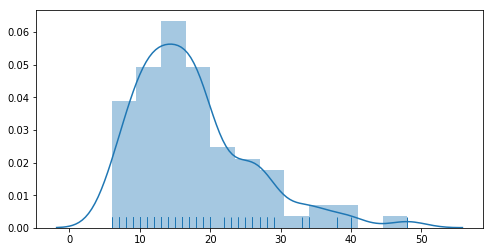

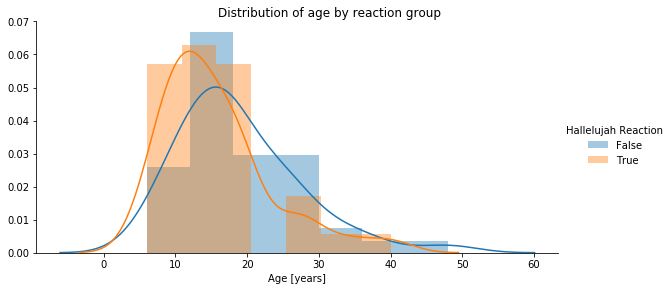

In [46]:
run_tests('Age [years]', 'age', bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=True, print_output=True)

In [47]:
df_results = pd.DataFrame({})

for c in ord_cols:
    try:
        result = run_tests(c, c)
        df_results = pd.concat([df_results, pd.DataFrame(result, index=[c])])
    except:
        print(f'Could not run tests for {c}')

In [51]:
df_results = df_results.sort_values(by='u_p')

i = np.arange(1, df_results.shape[0] + 1)
m = len(i)
Q = 0.15
benjamini_hochberg = ((i * 1.) / m) * Q
df_results['bh_threshold'] = benjamini_hochberg
df_results['significant'] = df_results.u_p < df_results.bh_threshold

df_results

,mean_true,mean_false,median_true,median_false,t_stat,t_p,u_stat,u_p,bh_threshold,significant
personality_neuroticism,6.027778,6.400000,6.0,6.0,-0.980348,0.329907,701.0,0.287728,0.03,False
personality_agreeableness,6.305556,6.622222,6.0,6.0,-0.833215,0.407235,734.5,0.465114,0.06,False
personality_openness,7.416667,7.600000,8.0,8.0,-0.466956,0.641817,759.0,0.625022,0.09,False
personality_conscientiousness,5.361111,5.377778,5.5,6.0,-0.037334,0.970313,793.0,0.873278,0.12,False
personality_extraversion,6.111111,6.066667,6.0,6.0,0.098092,0.922107,811.0,0.996157,0.15,False


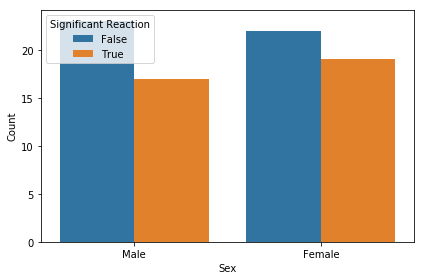

In [20]:
sns.countplot(x='sex', hue='critical_reaction', data=df_all)
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Significant Reaction')
plt.tight_layout()
plt.savefig(f'hallelujah_reaction_bar_sex_by_reaction_{notebook_song_name}_new_split.pdf')

In [21]:
# Chi-squared test of male/female proportions

cross = pd.crosstab(df_all['sex'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of sex vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
sex,,
female,23,17
male,22,19


Chi-squared test of sex vs hallelujah reaction proportions
Test statistic: 0.0154
p-value: 0.9011
Degrees of freedom: 1


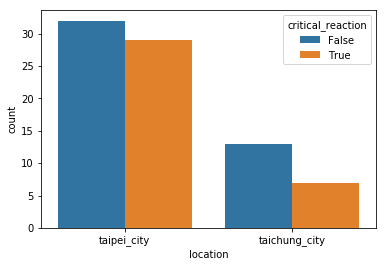

In [22]:
sns.countplot(x='location', hue='critical_reaction', data=df_all)

In [23]:
# Chi-squared test of location proportions

cross = pd.crosstab(df_all['location'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of location vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
location,,
taichung_city,13,7
taipei_city,32,29


Chi-squared test of location vs hallelujah reaction proportions
Test statistic: 0.5187
p-value: 0.4714
Degrees of freedom: 1


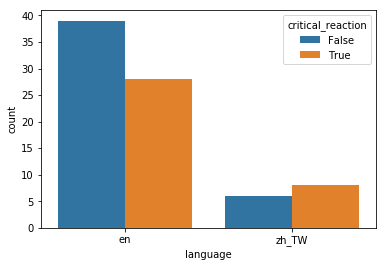

In [24]:
sns.countplot(x='language', hue='critical_reaction', data=df_all)

In [25]:
# Chi-squared test of language proportions

cross = pd.crosstab(df_all['language'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
language,,
en,39,28
zh_TW,6,8


Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)
Test statistic: 0.5710
p-value: 0.4499
Degrees of freedom: 1


Sources for Hotelling's $T^2$:
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf
- https://onlinecourses.science.psu.edu/stat505/node/100/

In [26]:
def hotelling_t2(X_1, X_2, alpha):
    
    import scipy.stats as sps
    
    n_1 = len(X_1)
    n_2 = len(X_2)

    y_1 = X_1.mean().as_matrix()
    y_1 = y_1.reshape(len(y_1), -1)
    y_2 = X_2.mean().as_matrix()
    y_2 = y_2.reshape(len(y_2), -1)

    # Covariance matrices
    S_1 = np.cov(X_1.astype(np.float64).T)
    S_2 = np.cov(X_2.astype(np.float64).T)

    # Pooled variance
    S_pooled_num = ((n_1 - 1) * S_1) + ((n_2 - 1) * S_2)
    S_pooled_denom = n_1 + n_2 - 2
    S_pooled = S_pooled_num / S_pooled_denom
    
    T_2 = (n_1 * n_2) / (n_1 + n_2)
    T_2 = T_2 * np.matmul((y_1 - y_2).T, np.linalg.pinv(S_pooled))
    T_2 = np.matmul(T_2, (y_1 - y_2))
    T_2 = T_2.squeeze()
    
    p = len(X_1.columns)
    F_num = n_1 + n_2 - p - 1
    F_denom = p * (n_1 + n_2 - 2)
    F = (F_num / F_denom) * T_2
    F = F.squeeze()
    
    df_1 = p
    df_2 = n_1 + n_2 - p - 1
    F_dist = sps.f(df_1, df_2)
    p_value = F_dist.cdf(F)
    
    # Calculate effect size
    D_2 = ((n_1 + n_2) * T_2) / (n_1 * n_2)
    
    return({
        'T2': T_2,
        'F': F,
        'df': (df_1, df_2),
        'p': p_value,
        'D2': D_2
    })

# Pairwise Hotelling's $T^2$

In [27]:
import itertools

plot_vars = ord_cols + cont_cols

pairs = list(itertools.combinations(plot_vars, 2))

results = pd.DataFrame(columns=['p', 'adjustedP', 'F', 'T2', 'df1', 'df2', 'D2'])
total_tests = 0

for pair in pairs:
    test_vars = list(pair)
    test_vars.append('critical_reaction')
    df_pair = df_all[test_vars].dropna()
    df_pair_1 = df_pair[df_pair['critical_reaction'] == False].drop(['critical_reaction'], axis=1)
    df_pair_2 = df_pair[df_pair['critical_reaction'] == True].drop(['critical_reaction'], axis=1)
    
    if df_pair_1.shape[0] == 0 and df_pair_2.shape[0] == 0:
        continue
    
    mardia_result = mardia(df_pair.drop(['critical_reaction'], axis=1), unbiased_cov=True)

    if not mardia_result[2]['result']:
        continue

    t2_results = hotelling_t2(df_pair_1, df_pair_2, 0.05)
    p = t2_results['p']
    adjusted_p = p * len(pairs)
    if adjusted_p > 1:
        adjusted_p = 1
        
    row = pd.DataFrame(
        {
            'p': t2_results['p'], 
            'adjustedP': adjusted_p,
            'F': t2_results['F'], 
            'T2': t2_results['T2'], 
            'df1': t2_results['df'][0], 
            'df2': t2_results['df'][1],
            'D2': t2_results['D2']
        }, 
        index=[pair])

    results = pd.concat([results, row])
    
alpha = 0.05

results.adjustedP = results.p * results.shape[0]
    
with pd.option_context('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x):
#     display('Tests for difference between combined means of {} and {} between hallelujah reaction groups:'.format(pair[0], pair[1]))
    display(results.sort_values(by='p'))

results.to_csv('hotelling_comparisons_{}.csv'.format(notebook_song_name))

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


,p,adjustedP,F,T2,df1,df2,D2
"(personality_extraversion, personality_conscientiousness)",0.00556,0.04447,0.00557,0.01129,2,78,0.00056
"(personality_agreeableness, personality_conscientiousness)",0.28935,2.31478,0.34307,0.69494,2,78,0.03475
"(personality_extraversion, personality_agreeableness)",0.31315,2.50517,0.37745,0.76458,2,78,0.03823
"(personality_agreeableness, personality_openness)",0.32781,2.62248,0.39924,0.80873,2,78,0.04044
"(personality_extraversion, personality_neuroticism)",0.37880,3.03037,0.47901,0.97031,2,78,0.04852
"(personality_conscientiousness, personality_neuroticism)",0.38780,3.10240,0.49380,1.00025,2,78,0.05001
"(personality_neuroticism, personality_openness)",0.44906,3.59248,0.60071,1.21682,2,78,0.06084
"(personality_agreeableness, personality_neuroticism)",0.59855,4.78838,0.92343,1.87054,2,78,0.09353


,p,adjustedP,F,T2,df1,df2,D2
"(personality_extraversion, personality_conscientiousness)",0.005559,0.04447,0.005575,0.011292,2,78,0.000565


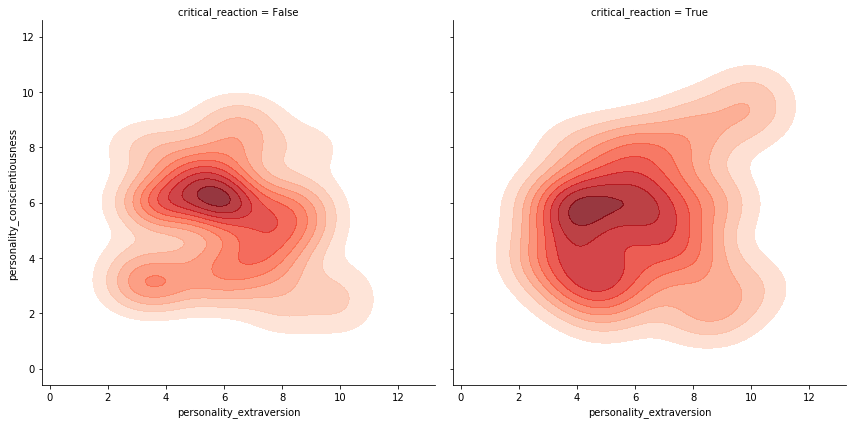

In [28]:
sig_results = results[results.adjustedP <= .05]

if sig_results.shape[0] > 0:
    for pair in sig_results.index.values:
        g = sns.FacetGrid(df_all[[pair[0], pair[1], 'critical_reaction']], col='critical_reaction', height=6, aspect=1, margin_titles=True)
        g.set_titles()
        g.map(sns.kdeplot, pair[0], pair[1], cmap='Reds', shade=True, shade_lowest=False, alpha=0.8)
        g.savefig('hallelujah_reaction_distributions_{}_{}_{}_by_reaction.pdf'.format(notebook_song_name, pair[0], pair[1]))
else:
    print('No significant results to plot')

sig_results